<a href="https://colab.research.google.com/github/GabrielMartinsz/Data-Science/blob/main/Dataset_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<head>
<style>
  body {
    display: flex;
    flex-direction: column;
    align-items: center;
    text-align: center;
    margin: 0;
    height: 100vh;
    justify-content: center;
  }
  #img {
    max-width: 60%;
  }
</style>
</head>
<body>
<h1><strong>Filmes | TMDB</strong></h1>
<p>Este projeto tem como objetivo realizar uma análise detalhada dos Filmes presentes no banco de dados do <strong>TMDB</strong> até a data <strong>28/07/2024</strong>.
</body>
<img id="img" src="https://hashtag.zoznam.sk/wp-content/uploads/2022/04/Avatar-2-dorazi-do-kin-v-decembri-2022-Zdroj-Disney.jpg" alt="Imagem">

</html>

<p>Vamos importar alguns pacotes necessários e os arquivos para análise. Os dados que usaremos neste projeto foram disponibilizados no Kaggle por <a href="https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies" target="_blank">ASANICZKA</a>.
</p>

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verificar o conteúdo do diretório
import os
print(os.listdir('/content/drive/MyDrive/Projetos/TMDB_Movies'))

# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from collections import Counter
import warnings

# Importar os arquivos
file_path = '/content/drive/MyDrive/Projetos/TMDB_Movies/TMDB_Dataset.csv'
if os.path.exists(file_path):
    df_TMDB = pd.read_csv(file_path, encoding='latin-1')
else:
    print(f"Arquivo não encontrado: {file_path}")

# Define o estilo padrão dos gráficos do Seaborn para ser usado no notebook
sns.set_style()

# Ignorar avisos
warnings.filterwarnings('ignore')


Mounted at /content/drive
['TMDB_Dataset.csv']


<h2><strong>Nessa primeira parte iremos conhecer nosso dataset e suas principais características</strong></h2>

In [ ]:
# Verificar o volume do DataFrame
print("Volume do DF: {}\n".format(df_TMDB.shape))

# Mostrar as primeiras 5 entradas
df_TMDB.head(5)

Volume do DF: (1069254, 24)



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
# Resumo estatístico dos dados
df_TMDB.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.069254e+06,1.069254e+06,1.069254e+06,1.069254e+06,1.069254e+06,1.069254e+06,1.069254e+06
mean,7.017624e+05,1.984478e+00,2.005799e+01,7.109373e+05,4.923598e+01,2.793304e+05,1.284659e+00
std,3.755764e+05,3.065844e+00,3.283572e+02,1.793536e+07,6.206131e+01,5.065217e+06,7.818959e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.907072e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.042325e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,0.000000e+00,6.000000e-01
75%,1.031474e+06,5.000000e+00,1.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00,8.850000e-01
max,1.322041e+06,1.000000e+01,3.449500e+04,3.000000e+09,1.440000e+04,9.000000e+08,2.994357e+03


In [ ]:
# Resumo geral das informações do DataFrame
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069254 entries, 0 to 1069253
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1069254 non-null  int64  
 1   title                 1069242 non-null  object 
 2   vote_average          1069254 non-null  float64
 3   vote_count            1069254 non-null  int64  
 4   status                1069254 non-null  object 
 5   release_date          920260 non-null   object 
 6   revenue               1069254 non-null  int64  
 7   runtime               1069254 non-null  int64  
 8   adult                 1069254 non-null  bool   
 9   backdrop_path         292381 non-null   object 
 10  budget                1069254 non-null  int64  
 11  homepage              115219 non-null   object 
 12  imdb_id               588509 non-null   object 
 13  original_language     1069254 non-null  object 
 14  original_title        1069242 non-

<h1><strong>Estatísticas Gerais</strong></h1>

<h3><strong>Maior Frequência de Gênero em Filmes</strong></h3>

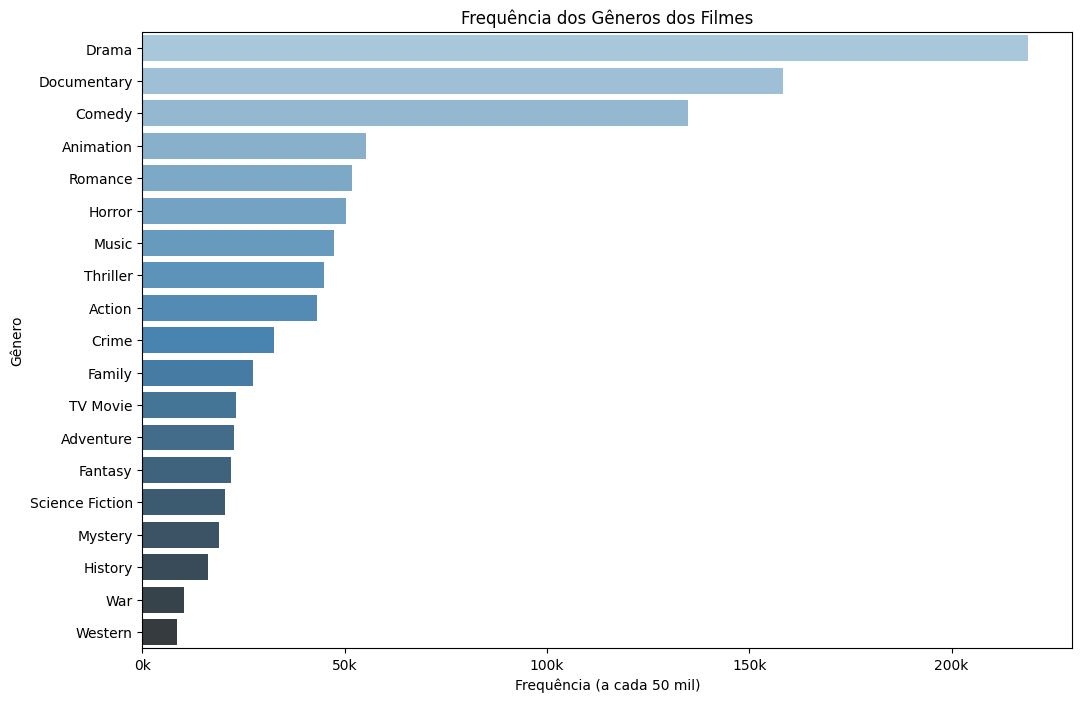

In [ ]:
# Definir uma paleta de cores azul escuro
colors = sns.color_palette("Blues_d", len(genre_counts))

# Ordenar os gêneros por frequência, do maior para o menor
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
sorted_genres_names, sorted_genres_counts = zip(*sorted_genres)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=list(sorted_genres_names), x=list(sorted_genres_counts), orient='h', palette=colors)
plt.title('Frequência dos Gêneros dos Filmes')
plt.xlabel('Frequência (a cada 50 mil)')
plt.ylabel('Gênero')

# Ajustar os rótulos do eixo X para mostrar incrementos de 50 mil
def format_func(value, tick_number):
    return f'{int(value / 1000)}k'

ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.show()

<h3><strong>Top 10 Filmes com Mais Avaliações</strong></h3>

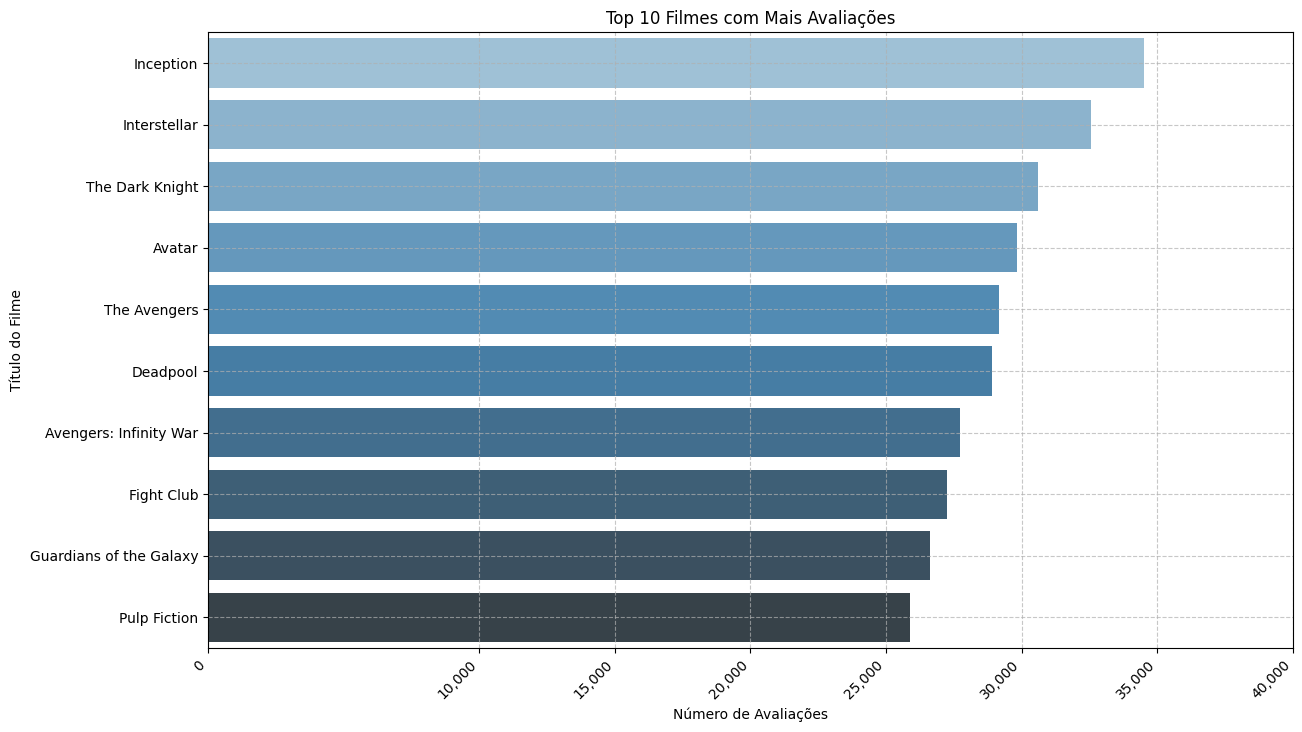

In [ ]:
# Classificar os filmes pelo número de avaliações em ordem decrescente
top_10_most_rated_movies = df_TMDB.sort_values(by='vote_count', ascending=False).head(10)

# Criar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_most_rated_movies, x='vote_count', y='title', palette='Blues_d')

# Definir os locais dos ticks principais e seus rótulos
ticks = [0, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
ax.set_xticks(ticks)
ax.set_xticklabels([f'{x:,}' for x in ticks])  # Formata os ticks com separadores de milhar

# Melhorar a apresentação dos ticks
plt.xticks(rotation=45, ha='right')

# Ajustar os limites do eixo X
plt.xlim(0, 40000)  # Define o limite máximo do eixo X para 40k

# Adicionar grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Top 10 Filmes com Mais Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Título do Filme')

plt.show()

<h3><strong>Top 10 Filmes Mais Bem Avaliados</strong></h3>

In [ ]:
# Descobrindo uma média aceitavel de avaliações

# Classificar o DataFrame pelo número de avaliações em ordem decrescente
sorted_movies = df_TMDB.sort_values(by='vote_count', ascending=False)

# Selecionar os 1000 filmes com o maior número de avaliações
top_1000_movies = sorted_movies.head(200)

# Calcular a média do número de avaliações
mean_vote_count = top_1000_movies['vote_count'].mean()

print(f"Média do número de avaliações nos 200 filmes com mais avaliações: {mean_vote_count:.2f}")

Média do número de avaliações nos 200 filmes com mais avaliações: 16710.35


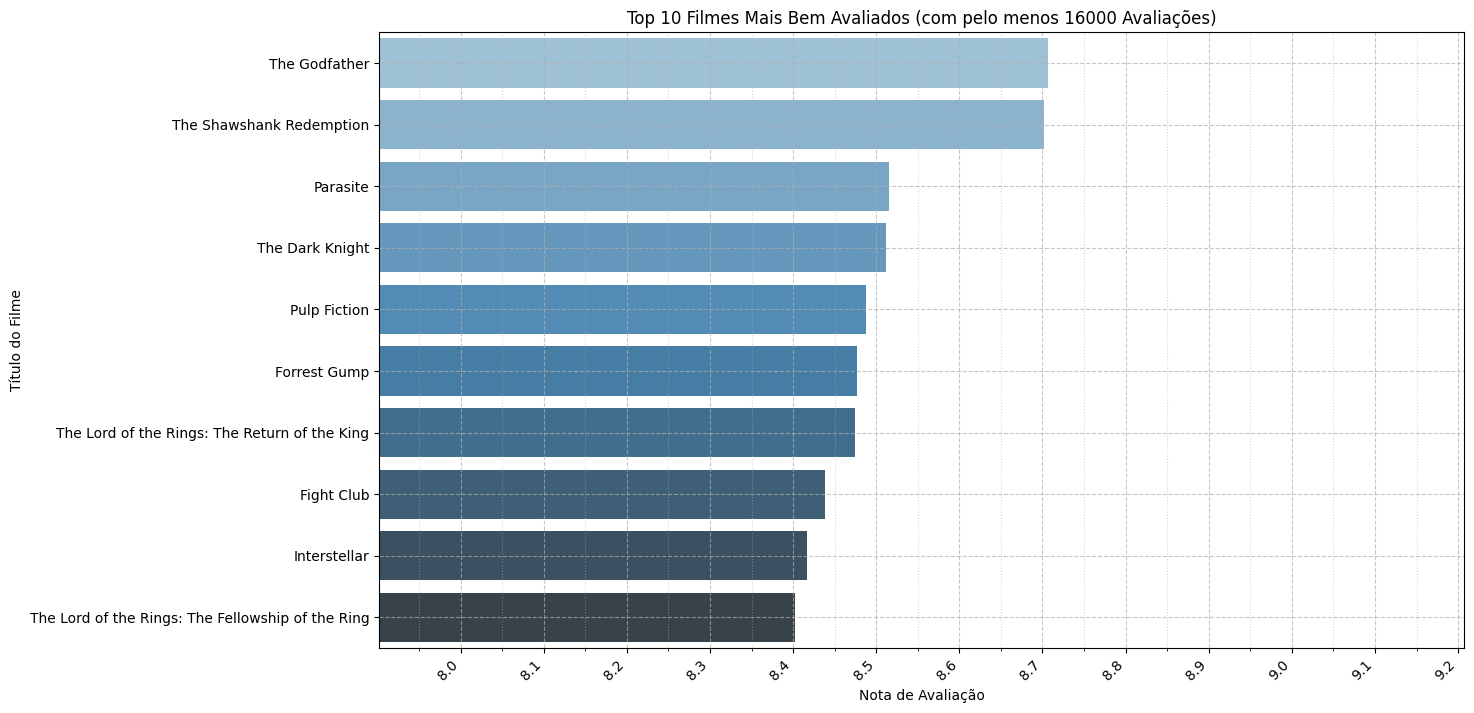

In [ ]:
# Definir o número mínimo de avaliações
min_votes = 16000

# Filtrar os filmes com pelo menos o número mínimo de avaliações
filtered_movies = df_TMDB[df_TMDB['vote_count'] >= min_votes]

# Classificar os filmes filtrados pela avaliação em ordem decrescente
top_movies = filtered_movies.sort_values(by='vote_average', ascending=False)

# Selecionar os 10 filmes mais bem avaliados
top_10_movies = top_movies.head(10)

# Criar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_movies, x='vote_average', y='title', palette='Blues_d')

# Ajustar a formatação dos ticks no eixo X
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))  # Intervalo dos principais ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))  # Intervalo dos sub-ticks
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))

# Melhorar a apresentação dos ticks
plt.xticks(rotation=45, ha='right')

# Ajustar os limites do eixo X
plt.xlim(top_10_movies['vote_average'].min() - 0.5, top_10_movies['vote_average'].max() + 0.5)

# Adicionar grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar grid para sub-ticks
ax.grid(True, which='minor', linestyle=':', alpha=0.5)

plt.title(f'Top 10 Filmes Mais Bem Avaliados (com pelo menos {min_votes} Avaliações)')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Título do Filme')

plt.show()

<h3><strong>Top 10 Filmes Piores Avaliados</strong></h3>

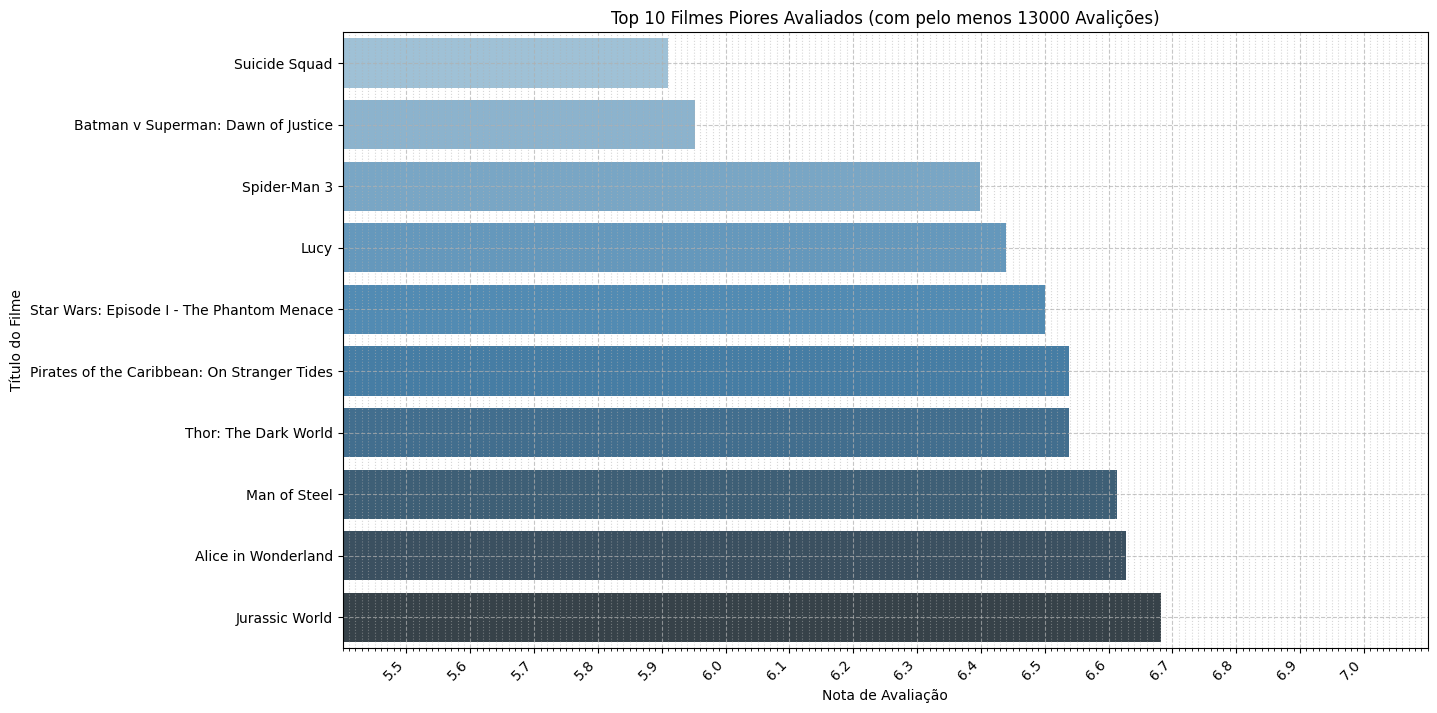

In [ ]:
# Filtrar filmes com pelo menos 16 mil avaliações
filtered_df = df_TMDB[df_TMDB['vote_count'] >= 13000]

# Encontrar os 10 filmes piores avaliados dentro desse filtro
bottom_10_least_rated_movies = filtered_df.sort_values(by='vote_average').head(10)

# Criar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=bottom_10_least_rated_movies, x='vote_average', y='title', palette='Blues_d')

# Definir os locais dos ticks principais e seus rótulos
ticks = [x / 10 for x in range(55, 71)]  # Gera ticks de 5.5 até 7.0 com incremento de 0.1
ax.set_xticks(ticks)
ax.set_xticklabels([f'{x:.1f}' for x in ticks])  # Formata os ticks com uma casa decimal

# Ajustar a formatação dos ticks no eixo X
ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))  # Define os locais dos ticks principais
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))  # Intervalo dos sub-ticks
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))  # Formatação dos principais ticks

# Melhorar a apresentação dos ticks
plt.xticks(rotation=45, ha='right')

# Ajustar os limites do eixo X
plt.xlim(5.4, 7.1)  # Ajusta o limite do eixo X para incluir espaço extra

# Adicionar grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar grid para sub-ticks
ax.grid(True, which='minor', linestyle=':', alpha=0.5)

plt.title('Top 10 Filmes Piores Avaliados (com pelo menos 13000 Avalições)')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Título do Filme')

plt.show()

<h3><strong>Top 10 Filmes com Maiores Orçamentos</strong></h3>

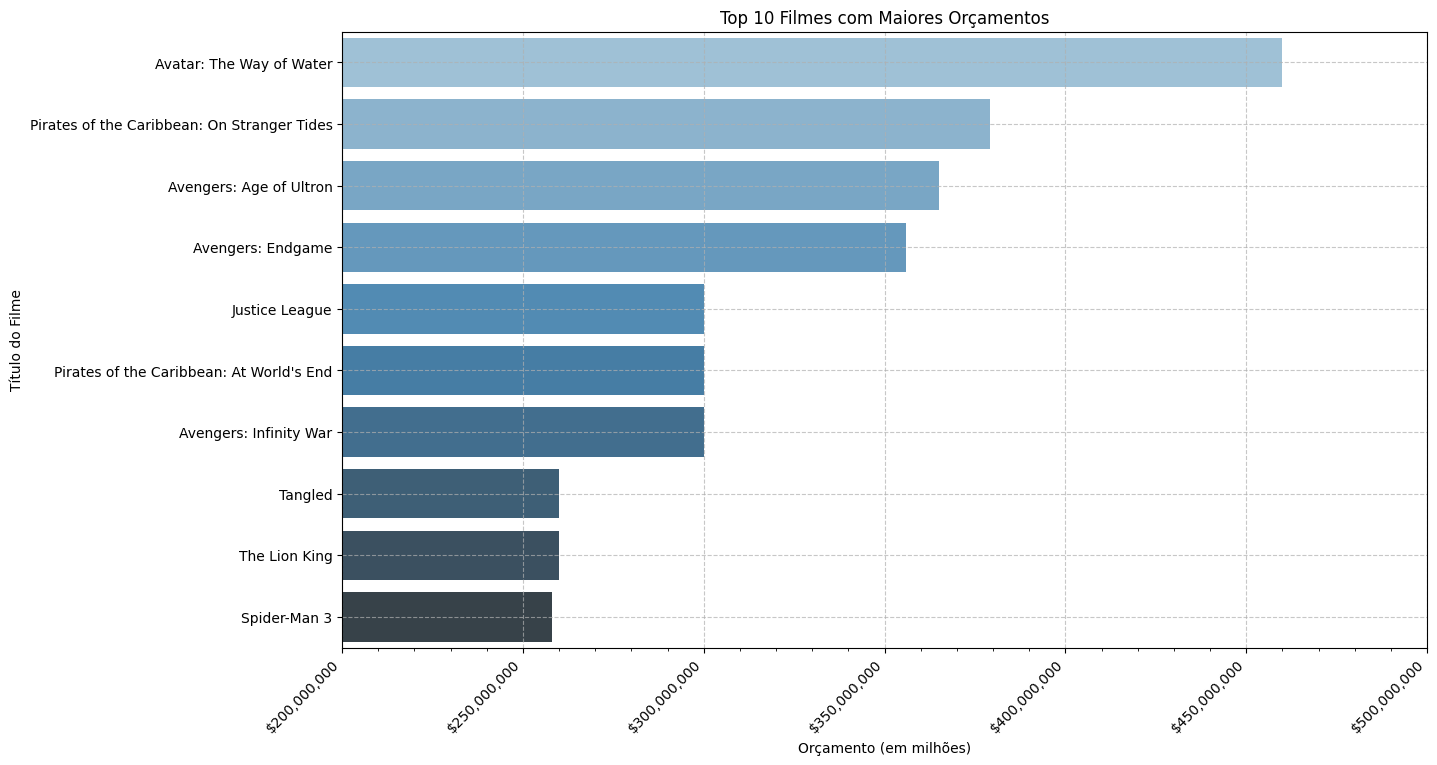

In [ ]:
# Filtrar filmes com pelo menos 8.000 avaliações
filtered_df = df_TMDB[df_TMDB['vote_count'] >= 8000]

# Encontrar os 10 filmes com maiores orçamentos dentro desse filtro
top_10_budgets = filtered_df.sort_values(by='budget', ascending=False).head(10)

# Criar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_budgets, x='budget', y='title', palette='Blues_d')

# Definir os locais dos ticks principais e seus rótulos
ticks = [x * 50_000_000 + 200_000_000 for x in range(7)]  # Gera ticks de 200M até 500M com incremento de 50M
ax.set_xticks(ticks)
ax.set_xticklabels([f'${x / 1e6:.0f}M' for x in ticks])  # Formata os ticks com uma casa decimal

# Ajustar a formatação dos ticks no eixo X
ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))  # Define os locais dos ticks principais
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10_000_000))  # Intervalo dos sub-ticks
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Formatação dos principais ticks

# Melhorar a apresentação dos ticks
plt.xticks(rotation=45, ha='right')

# Ajustar os limites do eixo X
plt.xlim(200_000_000, 500_000_000)  # Ajusta o limite do eixo X para incluir espaço extra

# Adicionar grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Top 10 Filmes com Maiores Orçamentos')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Título do Filme')

plt.show()


<h3><strong>Top 10 Filmes com Maiores Bilheterias</strong></h3>

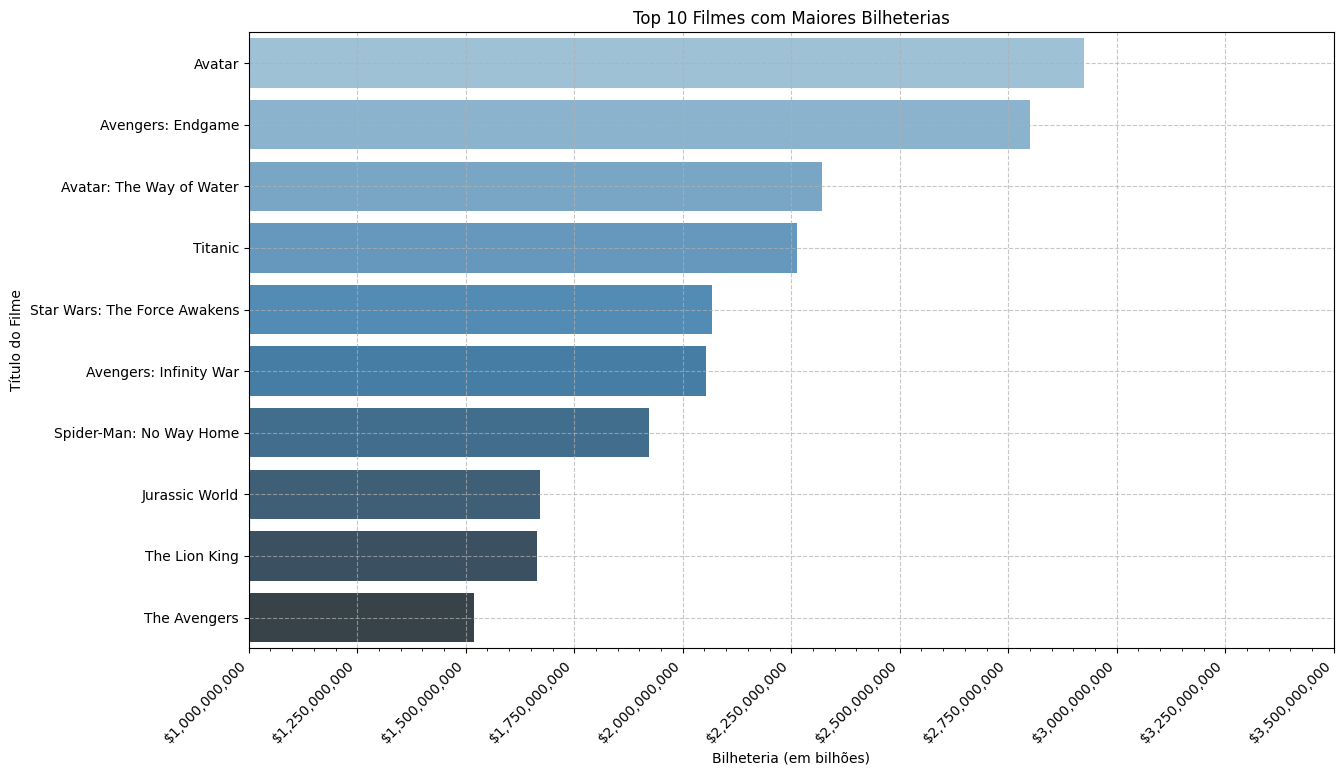

In [ ]:
# Filtrar filmes com pelo menos 8.000 avaliações
filtered_df = df_TMDB[df_TMDB['vote_count'] >= 8000]

# Encontrar os 10 filmes com as maiores bilheterias dentro desse filtro
top_10_revenues = filtered_df.sort_values(by='revenue', ascending=False).head(10)

# Criar o gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_10_revenues, x='revenue', y='title', palette='Blues_d')

# Definir os locais dos ticks principais e seus rótulos
ticks = [x * 250_000_000 for x in range(4, 15)]  # Gera ticks de 1B até 3.5B com incremento de 250M
ax.set_xticks(ticks)
ax.set_xticklabels([f'${x / 1e9:.1f}B' for x in ticks])  # Formata os ticks em bilhões

# Ajustar a formatação dos ticks no eixo X
ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))  # Define os locais dos ticks principais
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50_000_000))  # Intervalo dos sub-ticks
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Formatação dos principais ticks

# Melhorar a apresentação dos ticks
plt.xticks(rotation=45, ha='right')

# Ajustar os limites do eixo X
plt.xlim(1_000_000_000, 3_500_000_000)  # Ajusta o limite do eixo X para incluir espaço extra

# Adicionar grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Top 10 Filmes com Maiores Bilheterias')
plt.xlabel('Bilheteria (em bilhões)')
plt.ylabel('Título do Filme')

plt.show()


<h3><strong>Relação entre Orçamento e Bilheteria dos Filmes</strong></h3>

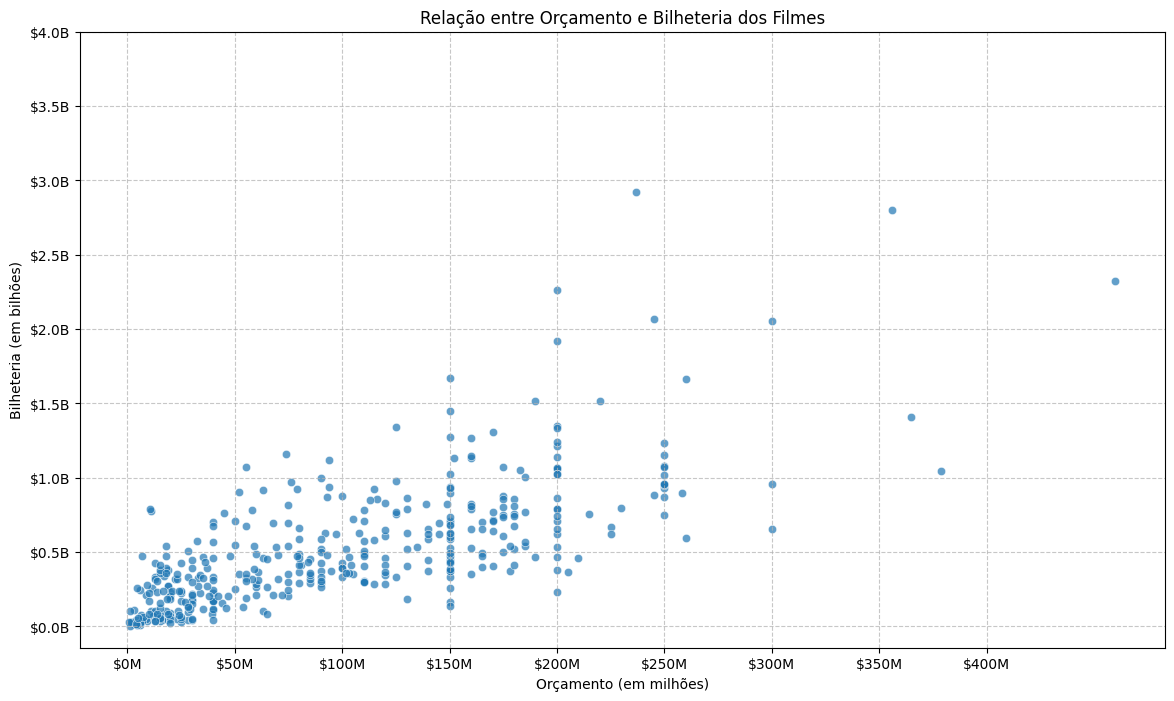

In [ ]:
# Filtrar filmes com pelo menos 10.000 avaliações e dados válidos de orçamento e bilheteria
filtered_df = df_TMDB[(df_TMDB['vote_count'] >= 8000) & (df_TMDB['budget'] > 0) & (df_TMDB['revenue'] > 0)]

# Criar o gráfico de dispersão
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=filtered_df, x='budget', y='revenue', alpha=0.7)

# Configurar o eixo X em milhões
x_ticks = [x * 50_000_000 for x in range(9)]  # De 0 a 400M com incremento de 50M
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'${x / 1e6:.0f}M' for x in x_ticks])

# Configurar o eixo Y em bilhões
y_ticks = [x * 500_000_000 for x in range(9)]  # De 0 a 4B com incremento de 500M
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'${x / 1e9:.1f}B' for x in y_ticks])

# Títulos e rótulos
plt.title('Relação entre Orçamento e Bilheteria dos Filmes')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Bilheteria (em bilhões)')

# Mostrar o gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h3><strong>Conclusões</strong></h3>

<p>
  • Usamos nesse projeto um Dataset do <strong>TMDB</strong> que foi fornecido através do <strong>Kaggle</strong> onde concluimos alguns pontos chaves em relação aos filmes.

<p>
  • O genero mais presente nos filmes com uma grande diferença é <strong>Drama</strong>, enquanto o genero <strong>Western</strong> é o menos presente.
</p>

<p>
  • Com o filtro minimo de avalições aplicados chegamos a conclusão que o filme mais bem avaliado é o <strong>The Godfather</strong>, e o pior avaliado é o <strong>Suicide Squad.</strong>
</p>

<p>
  • Verificamos tambem os filmes com mais avaliações totais e percebemos que o filme <strong>Interstellar</strong> está presente nos filmes mais avaliados e nos filmes mais bem avaliados, sendo um filme mais novo comparado aos demais.
</p>

<p>
  • Em relação ao Orçamento e Bilheteria, temos o filme <strong>Avatar: The Way of Water</strong> como o maior Orçamento e o Filme <strong>Avatar</strong> com Maior a Bilheteria.
</p>

<p>
  • Com um gráfico de dispersão, percebemos que a existe uma relação entre <strong>Orçamento</strong> e <strong>Bilheteria.</strong>
</p>

